In [ ]:
# Gradient Descent & Types of Gradient Descent

# The gradient descent algorithm is an optimization algorithm mostly used in machine learning and deep learning. Gradient
# descent adjusts parameters to minimize particular functions to local minima. In linear regression, it finds weight and biases,
#  and deep learning backward propagation uses the method.The algorithm objective is to identify model parameters like weight
#  and bias that reduce model error on training data.In this article, we will explore different types of gradient descent.
# Batch Gradient Descent:
# Stochastic Gradient Descent (SGD):
# Mini-Batch Gradient Descent:
# Each type of Gradient Descent has its own trade-offs, and the choice often depends on the specific problem,
# dataset size, and computational resources available.

# Validation set & Validation Loss

# In machine learning, a validation set and validation loss are crucial concepts for evaluating and improving model performance.
# Validation Set:
# Definition: A validation set is a subset of your data that is used to evaluate the performance of a model during training.
# It is separate from both the training set (used to train the model) and the test set (used to evaluate the final model performance).

# Model Tuning:
# Early Stopping:

# Validation Loss:
# Validation loss is the value of the loss function calculated on the validation set.
# It measures how well the model is performing on data that it hasn’t been trained on.
# Model Assessment:
# Overfitting Detection:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

tips = sns.load_dataset('tips')

In [2]:
X = tips.drop('total_bill', axis=1)
y = tips['total_bill']

X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'])

y_normalized = (y - y.min()) / (y.max() - y.min())  # Min-Max Scaling

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_normalized, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer: no activation function for regression
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.3110 - val_loss: 0.0825
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1245 - val_loss: 0.0599
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0785 - val_loss: 0.0557
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0546 - val_loss: 0.0420
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0354 - val_loss: 0.0406
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0342 - val_loss: 0.0367
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0297 - val_loss: 0.0329
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0226 - val_loss: 0.0303
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0226 - val_loss: 0.0277
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - val_loss: 0.0267
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0153 - val_loss: 0.0262
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - val_loss: 0.0253
E

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0207
Test Loss: 0.02009812742471695


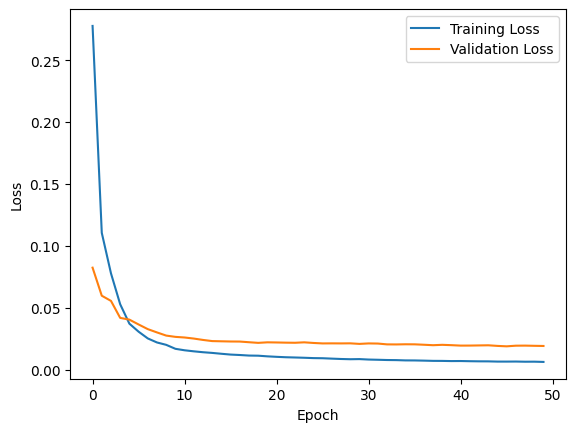

In [5]:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()